# Assignment 1 : SMS Spam Classification
# Rishika Tibrewal, MDS202135

## Importing Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
import csv
import re
import string

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

nltk.download('omw-1.4')

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


## Looking into the Data

In [4]:
data = pd.read_csv('SMSSpamCollection',sep='\t',header=None)
data.columns=['Label','Text']
data.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.isna().sum()

Label    0
Text     0
dtype: int64

In [6]:
data.groupby('Label').describe()

Text                                                               
      count unique                                                top freq
Label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

Assigning the label 'spam' as 1 and 'ham' as 0

In [7]:
data.loc[data.Label == 'spam', 'Label'] = 1
data.loc[data.Label == 'ham', 'Label'] = 0

In [8]:
def visualize(label):
    words = ''
    for msg in data[data['Label']==label]['Text']:
        msg = msg.lower()
        words+=msg + ' '
    wordcloud = WordCloud(width=600,height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')

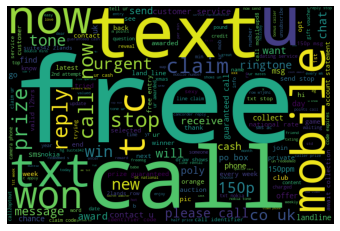

In [9]:
visualize(1)

As we can see, most of the spam messages contain words like free, text, call.

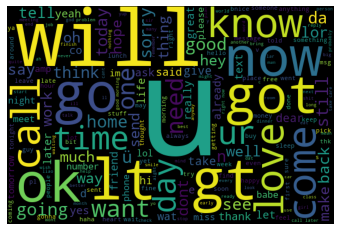

In [10]:
visualize(0)

Most of the ham messages contain words like u, will.

## Preprocessing Data

In [11]:
word_tokens=[]
regex=r"\w+"
for i in range(len(data['Text'])):
  word_tokens.append(re.findall(regex,data.Text[i]))

In [12]:
filtered_word_tokens=[]
lemmatizer = WordNetLemmatizer()
for i in range(len(word_tokens)):

  temp=[]

  for j in range(len(word_tokens[i])):
        
    if word_tokens[i][j].lower() in stop_words:
      continue
      
    elif word_tokens[i][j] in string.punctuation:
      continue
            
    else:
      temp.append(lemmatizer.lemmatize(word_tokens[i][j].lower()))   

  filtered_word_tokens.append(temp)

In [13]:
data['Preprocessed']=filtered_word_tokens 

In [14]:
data.head()

,Label,Text,Preprocessed
0,0,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...","[nah, think, go, usf, life, around, though]"


In [15]:
data.Preprocessed.head()

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4          [nah, think, go, usf, life, around, though]
Name: Preprocessed, dtype: object

In [16]:
def joinList(text):
    return " ".join(text)

data["Message"] = data["Preprocessed"].map(joinList)

In [17]:
data.head()

,Label,Text,Preprocessed,Message
0,0,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...","[nah, think, go, usf, life, around, though]",nah think go usf life around though


## Splitting data into Training, Validation and Test Set and saving them as csv

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data.Message, data['Label'], test_size=0.15, random_state=101)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=101)

In [19]:
len(X_train),len(y_train)

(4025, 4025)

In [20]:
X_train.head()

3331                           send yetty number pls
576     1 000 cash 2 000 prize claim call09050000327
4936       hey babe going ever figure going new year
4208                      let use next week princess
2219    nice talking please dont forget pix want see
Name: Message, dtype: object

In [21]:
y_train.head()

3331    0
576     1
4936    0
4208    0
2219    0
Name: Label, dtype: object

In [22]:
df_train = pd.DataFrame(list(zip(X_train,y_train)),columns=["Message",'Label'])
df_train.to_csv('Training Data.csv',index=False) 

In [23]:
len(X_val),len(y_val)

(711, 711)

In [24]:
X_val.head()

3803                             da happy sit together na
5076    2nd attempt contract u week top prize either 1...
2975                            text carlos let know hang
1547                          shant disturb u anymore jia
5272    hello u u 2 u b moving flat co need arrange pi...
Name: Message, dtype: object

In [25]:
y_val.head()

3803    0
5076    1
2975    0
1547    0
5272    0
Name: Label, dtype: object

In [26]:
df_val = pd.DataFrame(list(zip(X_val,y_val)),columns=["Message",'Label'])
df_val.to_csv('Validation Data.csv',index=False) 

In [27]:
len(X_test),len(y_test)

(836, 836)

In [28]:
X_test.head()

2373    watching tv lor funny bluff 4 wat izzit thk im...
1942    well done 4 costa del sol holiday 5000 await c...
54      sm ac sptv new jersey devil detroit red wing p...
1900                                    love working home
1564                     get ready put excellent sub face
Name: Message, dtype: object

In [29]:
y_test.head()

2373    0
1942    1
54      1
1900    0
1564    0
Name: Label, dtype: object

In [30]:
df_test = pd.DataFrame(list(zip(X_test,y_test)),columns=["Message",'Label'])
df_test.to_csv('Test Data.csv',index=False) 